### FE670 - Assignment #4

**Author**: Sid Bhatia

**Date**: November 27th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Steve Yang

#### Problem #1

The Relative Strength Index is a momentum oscillator that is used by traders to identify whether the market is in the state of overbought or oversold. A market is considered to be in the state of overbought when an asset is constantly bought by traders moving it to an extremely bullish trend and bound to consolidate. Similarly, a market is considered to be in the state of oversold when an asset is constantly sold by traders moving it to a bearish trend and tends to bounce back.

As an oscillation market indicator, the values of RSI bound between 0 to 100. The traditional way to evaluate a market state using the Relative Strength Index is that an RSI reading of 70 or above reveals a state of overbought, and similarly, an RSI reading of 30 or below represents the market is in the state of oversold. The standard setting of RSI is 14 as the lookback period.

RSI is determined with directional price moves during a given time period $N$ (usually $N = 14$ days).

$RSI = 100.0 - (100.0/(1.0 + RS)), RS = \frac{n_{up}}{n_{down}}$

$n_{up}$ and $n_{down}$ are the numbers of upward moves and downward moves of closing price, respectively.

Usually, these numbers are exponentially smoothed:

$$n_{up}(t) = (1 - \beta) * n_{up}(t - 1) + \beta U(t), \\ 
n_{down}(t) = (1 - \beta) * n_{down}(t - 1) + \beta D(t), \\
\text{where} \\
U(t) = 1, P_t > P_{t - 1}; U(t) = 0, P_t \leq P_{t - 1} \\
D(t) = 1, P_{t - 1} > P_t; D(t) = 0, P_{t - 1} \leq P_t$$

There are three steps involved in the calculation of RSI.

1. Calculating the Exponential Moving Average (EMA) of the gain and loss of an asset: A word on Exponential Moving Average. EMA is a type of Moving Average (MA) that automatically allocates greater weighting (nothing but importance) to the most recent data point and lesser weighting to data points in the distant past. In this step, we will first calculate the returns of the asset and separate the gains from losses. Using these separated values, the two EMAs for a specified number of periods are calculated.

2. Calculating the Relative Strength of an asset: The Relative Strength of an asset is determined by dividing the Exponential Moving Average of the gain of an asset from the Exponential Moving Average of the loss of an asset for a specified number of periods. It can be mathematically represented in equation (2).

3. Calculating the RSI values: In this step, we will calculate the RSI itself by making use of the Relative Strength values we calculated in the previous step. To calculate the values of RSI of a given asset for a specified number of periods, there is a formula that we need to follow equation (1).

Our strategy reveals a buy signal whenever the previous RSI value is above the oversold level and the current RSI value crosses below the oversold level. Likewise, the strategy reveals a sell signal whenever the previous RSI value is below the oversold level and the current RSI value crosses above the oversold level. Our trading strategy can be represented as follows:

$$\text{If RSI}(t - 1) > 30 \; \& \; \text{RSI}(t) < 30, \Rightarrow \text{BUY} \\
\text{If RSI}(t - 1) < 70 \; \& \; \text{RSI}(t) > 70, \Rightarrow \text{SELL}$$

Please use the dataset “SP20-2017-2021.csv” and select the stock with the highest volatility, and design a RSI based trading strategy and following the following steps:

1. You are going to calculate the values of RSI with 14 as the lookback period using the RSI formula we discussed before. Note: you are defining a function named *get_rsi* that takes the closing price of a stock *ticker* and the lookback period *lookback* as parameters. Inside the function, you are first calculating the returns of the stock using the *diff* function provided by the Pandas package and stored it into the *ret* variable. This function basically subtracts the current value from the previous value. Next, you are passing a for-loop on the *ret* variable to distinguish gains from losses and append those values to the concerning variable (*up* or *down*).

In [102]:
import pandas as pd

# Load the CSV file into a DataFrame.
file_path = "C:/Users/sbhatia2/My Drive/University/Academics/Semester V/FE670 - Algorithmic Trading Strategies/FE670 - Homework/FE670 - Homework #4/SP20-2017-2021-1.csv"
data = pd.read_csv(file_path)

print(data.head())

# Drop rows with NaN values.
data_cleaned = data.dropna()

print(data_cleaned.head())

# Extract the tickers from DataFrame.
tickers = [col for col in data.columns if col != 'Date'] 

print(tickers)

# Convert 'Date' column to DateTime index.
if 'Date' in data_cleaned.columns:
    data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
    data_cleaned.set_index('Date', inplace=True)

# Convert all columns except 'Date' to numeric, ignoring non-numeric values.
for ticker in data_cleaned.columns:
    if ticker != 'Date':
        data_cleaned[ticker] = pd.to_numeric(data_cleaned[ticker], errors='coerce')

# Calculate the standard deviation of daily returns for each stock (volatility).
volatility = data_cleaned.apply(lambda x: x.pct_change().std())

# Identify the ticker with the highest volatility.
most_volatile_ticker = volatility.idxmax()

print(most_volatile_ticker)

['CHK', 'AMD', 'LNT', 'FCX', 'VRTX', 'WMB', 'INCY', 'NFLX', 'MRO', 'MU', 'MCD', 'BRK-B', 'SO', 'T', 'KO', 'PG', 'JNJ', 'WM', 'RSG', 'PEP']


C:\Users\sbhatia2\AppData\Local\Temp\ipykernel_22768\3428415187.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
C:\Users\sbhatia2\AppData\Local\Temp\ipykernel_22768\3428415187.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[ticker] = pd.to_numeric(data_cleaned[ticker], errors='coerce')


'MRO'

In [85]:
def get_rsi(ticker: pd.Series, lookback: int = 14) -> pd.Series:
    """
    Calculate the Relative Strength Index (RSI) for a given stock.

    Args:
    ticker (pd.Series): A Pandas Series containing the closing prices of the stock.
    lookback (int, optional): The lookback period for calculating RSI. Default is 14.

    Returns:
    pd.Series: A Pandas Series containing the RSI values.

    The RSI is calculated using the formula:
    RSI = 100 - 100 / (1 + RS), where RS is the ratio of the exponential moving average (EMA)
    of 'lookback' days' gains to the EMA of 'lookback' days' losses.
    """
    # Calculate returns.
    ret = ticker.diff()

    # Initialize lists to store up and down movements.
    up, down = [], []

    # Distinguish gains and losses.
    for change in ret[1:]:  # Skip the first NaN value.
        if change > 0:
            up.append(change)
            down.append(0)
        else:
            down.append(abs(change))
            up.append(0)

    # Convert lists to Series.
    up_series = pd.Series(up)
    down_series = pd.Series(down)

    # Calculate the EMA of the gains and losses.
    ema_up = up_series.ewm(span=lookback, adjust=False).mean()
    ema_down = down_series.ewm(span=lookback, adjust=False).mean()

    # Calculate Relative Strength (RS).
    RS = ema_up / ema_down

    # Calculate RSI.
    RSI = 100.0 - (100.0 / (1.0 + RS))

    # Set the first 'lookback' values to NaN
    RSI[:lookback] = pd.NA

    return RSI

# Calculate RSI for the most volatile ticker.
rsi_values = get_rsi(data_cleaned[most_volatile_ticker], lookback=14)

# Number of initial NaN values in RSI (equal to lookback period).
nan_count = rsi_values.isna().sum()

# Trim the same number of rows from the start of data_cleaned + 1.
trimmed_data_cleaned = data_cleaned.iloc[nan_count+1:]

# Trim NaN values from the RSI data.
rsi_values = rsi_values.dropna()

# Now, set the index of rsi_values to match the trimmed data_cleaned index.
rsi_values.index = trimmed_data_cleaned.index

print(rsi_values.head())
print(trimmed_data_cleaned.head())

Date
2021-03-04    73.360626
2021-03-05    78.336940
2021-03-08    64.816870
2021-03-09    57.557573
2021-03-10    60.511917
dtype: float64
                  CHK        AMD        LNT        FCX        VRTX        WMB   
Date                                                                            
2021-03-04  45.565807  77.750000  46.208012  32.490631  207.789993  22.972406  \
2021-03-05  44.431103  78.519997  47.373005  34.795776  211.979996  23.115328   
2021-03-08  43.779881  73.959999  48.665264  34.209553  213.580002  22.981936   
2021-03-09  43.691074  78.529999  48.831688  33.643204  214.039993  22.448357   
2021-03-10  44.154823  77.519997  49.330975  34.239365  214.289993  23.248722   

                 INCY        NFLX        MRO         MU         MCD   
Date                                                                  
2021-03-04  77.500000  511.290009  12.266856  84.212288  202.604141  \
2021-03-05  80.260002  516.390015  12.882185  88.805862  205.106522   
2021-03-

2. You are going to plot the calculated Relative Strength Index values of the selected stock to make more sense out of it. The main aim of this part is not on the coding section but instead to observe the plot to gain a solid understanding of RSI. Please plot the price and RSI on the same graph with different colors.

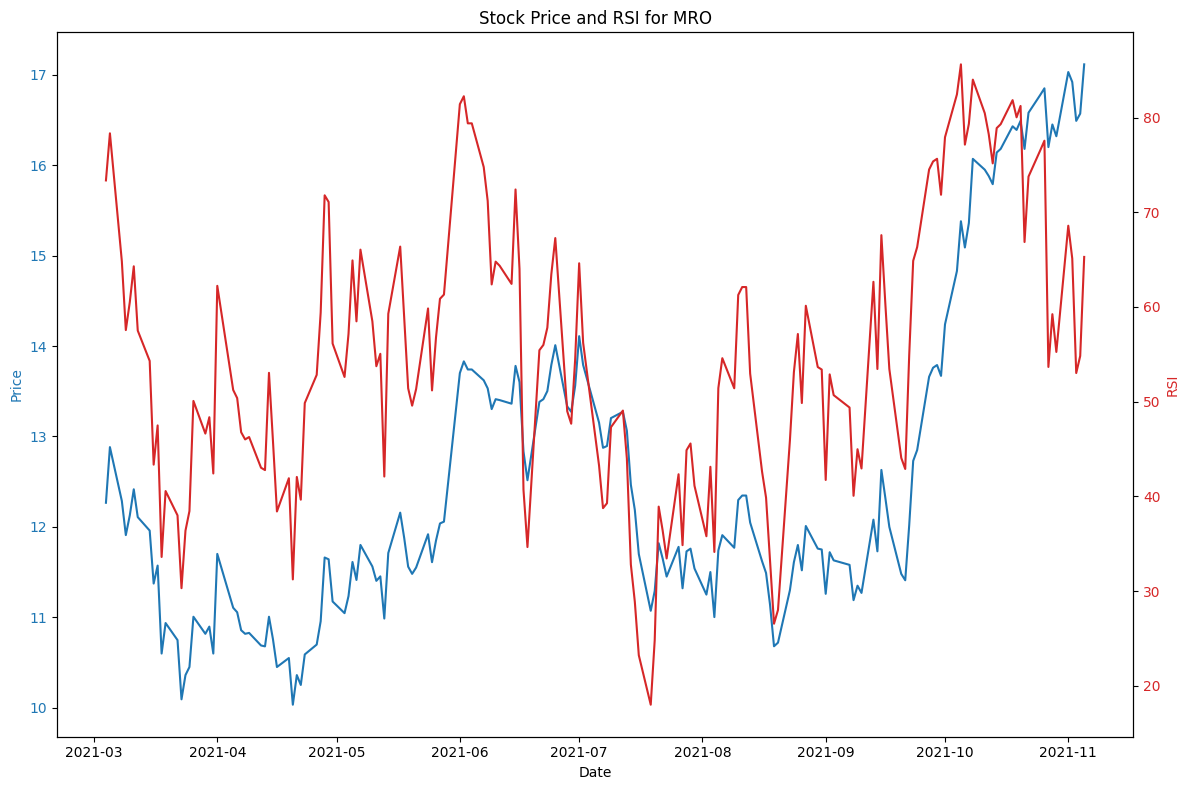

In [87]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting the stock price.
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color=color)
ax1.plot(trimmed_data_cleaned.index, trimmed_data_cleaned[most_volatile_ticker], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the RSI.
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('RSI', color=color)
ax2.plot(trimmed_data_cleaned.index, rsi_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title(f'Stock Price and RSI for {most_volatile_ticker}')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

3. You are going to implement the discussed Relative Strength Index trading strategy in Python. Note: First, you are defining a function named *implement_rsi_strategy* which takes the stock prices (*prices*), and the RSI values (*rsi*) as parameters. Inside the function, you are creating three empty lists (*buy_price*, *sell_price*, and *rsi_signal*) in which the values will be appended while creating the trading strategy. Finally, you are returning the lists appended with values. Then, you are calling the created function and stored the values into their respective variables.

In [91]:
from typing import List, Tuple
import pandas as pd

def implement_rsi_strategy(prices: pd.Series, rsi: pd.Series) -> Tuple[List[float], List[float], List[int]]:
    """
    Implement an RSI trading strategy on a series of stock prices.

    Args:
    prices (pd.Series): A Pandas Series of stock prices.
    rsi (pd.Series): A Pandas Series of RSI values corresponding to the stock prices.

    Returns:
    Tuple[List[float], List[float], List[int]]: Three lists containing the buy prices, sell prices, and RSI signals.

    The strategy is as follows:
    - Buy when the previous RSI value is above 30 and the current RSI value crosses below 30.
    - Sell when the previous RSI value is below 70 and the current RSI value crosses above 70.
    """

    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(1, len(rsi)):
        # Buy signal
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(float('nan'))
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(float('nan'))
                sell_price.append(float('nan'))
                rsi_signal.append(0)
        # Sell signal
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                sell_price.append(prices[i])
                buy_price.append(float('nan'))
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(float('nan'))
                sell_price.append(float('nan'))
                rsi_signal.append(0)
        else:
            # No action (hold)
            buy_price.append(float('nan'))
            sell_price.append(float('nan'))
            rsi_signal.append(0)

    return buy_price, sell_price, rsi_signal

buy_price, sell_price, rsi_signal = implement_rsi_strategy(trimmed_data_cleaned[most_volatile_ticker], rsi_values)

4. You are going to plot the created trading lists to make sense out of them. You are plotting the Relative Strength Index values along with the buy and sell signals generated by the trading strategy. You can observe that whenever the RSI line crosses from above to below the lower band or the oversold level, a green-colored buy signal is plotted in the chart. Similarly, the RSI line crosses from below to above the upper band or the overbought level, a red-colored sell signal is plotted in the chart.

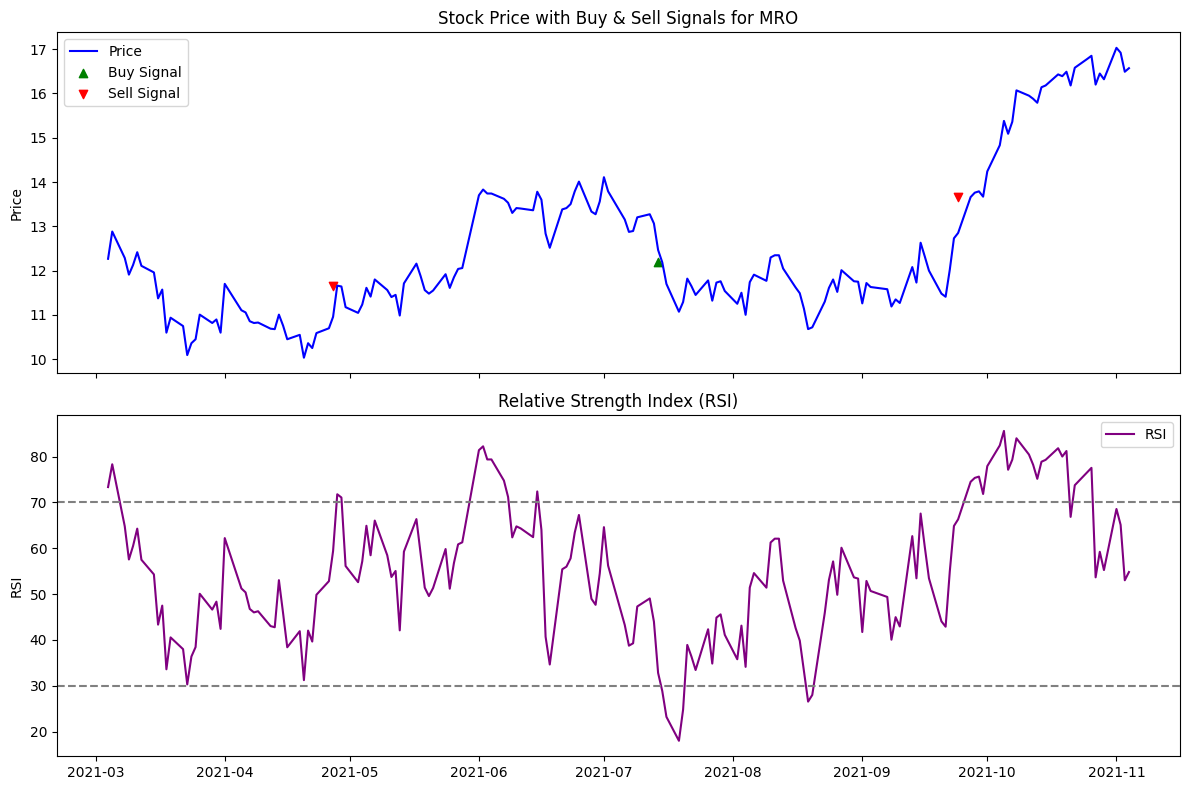

In [100]:
prices = trimmed_data_cleaned[most_volatile_ticker]
rsi = rsi_values

# Adjust prices and rsi length to match buy_price and sell_price lengths.
prices = prices[:-1]
rsi = rsi[:-1]

# Convert lists to Pandas Series for easier plotting.
buy_price_series = pd.Series(buy_price, index = prices.index)
sell_price_series = pd.Series(sell_price, index = prices.index)

# Create a figure and a set of subplots.
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plotting the stock price and buy/sell signals.
ax[0].plot(prices.index, prices, label='Price', color='blue')
ax[0].scatter(prices.index, buy_price_series, label='Buy Signal', marker='^', color='green')
ax[0].scatter(prices.index, sell_price_series, label='Sell Signal', marker='v', color='red')
ax[0].set_title(f'Stock Price with Buy & Sell Signals for {most_volatile_ticker}')
ax[0].set_ylabel('Price')
ax[0].legend()

# Plotting the RSI values.
ax[1].plot(prices.index, rsi, label='RSI', color='purple')
ax[1].axhline(30, color='grey', linestyle='--')
ax[1].axhline(70, color='grey', linestyle='--')
ax[1].set_title('Relative Strength Index (RSI)')
ax[1].set_ylabel('RSI')
ax[1].legend()

plt.tight_layout()
plt.show()

5.  You are going to create a list that indicates 1 if we hold the stock or 0 if we dont own or hold the stock. First, you are creating an empty list named *position*. You are passing two for-loops, one is to generate values for the *position* list to just match the length of the *signal* list. The other for-loop is the one we are using to generate actual position values. Finally, you are doing some data manipulations to combine all the created lists into one dataframe.

In [104]:
# Initialize the 'position' list.
position = [0] * len(rsi_signal)

# Set the holding position based on the RSI signals.
for i in range(1, len(rsi_signal)):
    # If the signal is a buy signal (1), we should hold the stock (set position to 1)
    if rsi_signal[i] == 1:
        position[i] = 1
    # If the signal is a sell signal (-1), we should not hold the stock (set position to 0)
    elif rsi_signal[i] == -1:
        position[i] = 0
    # Else, we maintain the previous position
    else:
        position[i] = position[i-1]

# Combine the lists into a DataFrame.
combined_data = pd.DataFrame({
    'Prices': prices,
    'RSI': rsi,
    'RSI Signal': rsi_signal,
    'Buy Price': buy_price,
    'Sell Price': sell_price,
    'Position': position
}, index=prices.index)

# Display the first and last few rows of the DataFrame.
print(combined_data.head())
print(combined_data.tail())

               Prices        RSI  RSI Signal  Buy Price  Sell Price  Position
Date                                                                         
2021-03-04  12.266856  73.360626           0        NaN         NaN         0
2021-03-05  12.882185  78.336940           0        NaN         NaN         0
2021-03-08  12.286706  64.816870           0        NaN         NaN         0
2021-03-09  11.909570  57.557573           0        NaN         NaN         0
2021-03-10  12.127913  60.511917           0        NaN         NaN         0
               Prices        RSI  RSI Signal  Buy Price  Sell Price  Position
Date                                                                         
2021-10-29  16.320000  55.249701           0        NaN         NaN         0
2021-11-01  17.030001  68.577511           0        NaN         NaN         0
2021-11-02  16.920000  65.110935           0        NaN         NaN         0
2021-11-03  16.490000  53.021801           0        NaN         

#### Problem #2

Price action trading is a systematic trading practice, aided by technical analysis tools and recent price history, where traders are free to take their own decisions within a given scenario to take trading positions, as per their subjective, behavioral and psychological state. Since price action trading is an approach to price predictions and speculation, it is used by retail traders, speculators, arbitrageurs and even trading firms who employ traders. It can be used on a wide range of securities including equities, bonds, forex, commodities, derivatives, etc.

Most scenarios involve a two-step process:

1. Identifying a scenario: Like a stock price getting into a bull/bear phase, channel range, breakout, etc.

2. Within the scenario, identifying trading opportunities: Like once a stock is in bull run, is it likely to (a) overshoot or (b) retreat. This is a completely subjective choice and can vary from one trader to the other, even given the same identical scenario.

The random forest algorithm expands on the randomization introduced by the bootstrap samples generated by bagging to reduce variance further and improve predictive performance. In addition to training each ensemble member on bootstrapped training data, random forests also randomly sample from the features used in the model (without replacement). Depending on the implementation, the random samples can be drawn for each tree or each split. As a result, the algorithm faces different options when learning new rules, either at the level of a tree or for each split.

You are given a dataset for the 10 stock which consists of the adjusted closing price of each of the 10 stocks. These stock tickers are: ‘GOOGL’, ‘TSLA’, ‘FB’, ‘AMZN’, ‘AAPL’, ‘MSFT’, ‘VOD’, ‘ADBE’, ‘NVDA’, ‘CRM’. This dataset includes all data from January 01, 2015 to December 31, 2020 in “all stocks 10 2015 2020.csv”. You are asked to design a trading strategy based on the Random Forest classification algorithm to trade on all these ten stocks and use Sharpe ratio as your trading performance. You need to training your model using the first 4 years of data and then evaluate the performance of your trading strategy using 2020 data. You are to use Python pandas.ta package to use generate set of following features:

1. EMA14: The Exponential Moving Average is more responsive moving average compared to the Simple Moving Average (SMA). Length = 14

2. EMA22: The Exponential Moving Average is more responsive moving average compared to the Simple Moving Average (SMA). Length = 22

3. RSI: The Relative Strength Index is popular momentum oscillator used to measure the velocity as well as the magnitude of directional price movements.

4. PPO: The Percentage Price Oscillator is similar to MACD in measuring momentum.

5. MACD: The MACD is a popular indicator to that is used to identify a security’s trend.

6. CMO: Attempts to capture the momentum of an asset with overbought at 50 and oversold at -50.

7. RETURN: The current return defined as log price difference.

1. Design a simple trading rule: when $p_t > p_{t - 1}$ and then buy; otherwise sell. Use the Random Forest algorihtm to build a classifier on the 7 features to forecast the next day price trend. Use the same rule to trade on the 10 stocks, and select a highest performing stock. Note: when compare the performance, use Sharpe ratio (mean/std) for the testing period.

In [39]:
import pandas as pd
import pandas_ta as ta
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from typing import Dict, Tuple

def load_data(file_path: str) -> pd.DataFrame:
    """
    Load the stock data from a CSV file.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: A DataFrame containing the loaded stock data.
    """
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

def sharpe_ratio(returns: pd.Series) -> float:
    """
    Calculate the Sharpe ratio for a series of returns.

    Args:
    returns (pd.Series): A pandas Series representing the returns of a trading strategy.

    Returns:
    float: The Sharpe ratio calculated as the mean of the returns divided by their standard deviation.
    """
    return returns.mean() / returns.std()

def calculate_indicators(stock_df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate technical indicators for a given stock.

    Parameters:
    stock_df (pd.DataFrame): DataFrame containing stock data.

    Returns:
    pd.DataFrame: DataFrame with calculated technical indicators.
    """
    stock_df['EMA14'] = ta.ema(stock_df['Close'], length=14)
    stock_df['EMA22'] = ta.ema(stock_df['Close'], length=22)
    stock_df['RSI'] = ta.rsi(stock_df['Close'])
    stock_df['PPO'] = ta.ppo(stock_df['Close'])
    stock_df['MACD'] = ta.macd(stock_df['Close'])['MACD_12_26_9']
    stock_df['CMO'] = ta.cmo(stock_df['Close'])
    stock_df['RETURN'] = np.log(stock_df['Close'] / stock_df['Close'].shift(1))
    return stock_df.dropna()

# Load the dataset.
file_path = 'C:/Users/sbhatia2/My Drive/University/Academics/Semester V/FE670 - Algorithmic Trading Strategies/FE670 - Homework/FE670 - Homework #4/all_stocks_10_2015_2020.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

print(data.head())

# Retrieve tickers from dataset.
tickers = list(data.columns)

print(tickers)

# Process data for each stock.
results: List[Tuple[str, float]] = []

for stock in data.columns:
    stock_data = pd.DataFrame(data[stock].dropna()).rename(columns={stock: 'Close'})

    stock_data = add_technical_indicators(stock_data)

    print(stock_data)

    # # Split the data into training and testing sets
    # train_data = stock_data[stock_data.index.year < 2020]
    # test_data = stock_data[stock_data.index.year == 2020]

    # print(train_data)
    # print(test_data)
    
    # # Check if there is enough data
    # if train_data.empty or test_data.empty:
    #     print(f"Not enough data for training or testing for stock: {stock}")
    #     continue

    # train_data['Target'] = (train_data['Close'] > train_data['Close'].shift(1)).astype(int)
    # test_data['Target'] = (test_data['Close'] > test_data['Close'].shift(1)).astype(int)

    # # Define features and train the Random Forest model
    # features = ['EMA14', 'EMA22', 'RSI', 'PPO', 'MACD', 'CMO', 'RETURN']
    # model = RandomForestClassifier(n_estimators=100, random_state=0)
    
    # try:
    #     model.fit(train_data[features], train_data['Target'])
    # except ValueError as e:
    #     print(f"Error training model for stock: {stock}. Error: {e}")
    #     continue

    # # Predict on test data
    # test_data['Predicted'] = model.predict(test_data[features])
    # test_data['Strategy_Return'] = test_data['RETURN'] * test_data['Predicted']

    # # Calculate Sharpe ratio
    # sharpe = sharpe_ratio(test_data['Strategy_Return'])
    # results.append((stock, sharpe))

                 GOOGL       TSLA         FB        AMZN       AAPL   
Date                                                                  
2015-01-02  529.549988  43.862000  78.449997  308.519989  24.745998  \
2015-01-05  519.460022  42.018002  77.190002  302.190002  24.048861   
2015-01-06  506.640015  42.256001  76.150002  295.290009  24.051125   
2015-01-07  505.149994  42.189999  76.150002  298.420013  24.388374   
2015-01-08  506.910004  42.124001  78.180000  300.459991  25.325432   

                 MSFT        VOD       ADBE      NVDA        CRM  
Date                                                              
2015-01-02  41.193832  23.353846  72.339996  4.840063  59.240002  
2015-01-05  40.815022  22.530323  71.980003  4.758315  58.169998  
2015-01-06  40.215969  22.386202  70.529999  4.614049  57.200001  
2015-01-07  40.726925  22.537180  71.110001  4.602028  56.930000  
2015-01-08  41.925045  23.326395  72.919998  4.775145  58.590000  
['GOOGL', 'TSLA', 'FB', 'AMZN', '

2.  Now assume an updated trading rule: when $\frac{p_t - p_{t-1}}{p_{t-1}} \geq \delta$, and $\delta = 0.10$ and then buy; otherwise sell. From the last step find the highest performing stock, and change $\delta$ in different values such as 2%, 5%, 12% and 15%, and re-evaluate the strategy to recommend a better trading strategy. Again, please use out-of-sample Sharpe ratio to measure strategy performance. 